# Import Libraries

In [1]:
from PIL import Image

# Obtain Images

In [5]:
# class no drugs
ndim01 = Image.open('../data/interim/class_nodrug/nodrug_image_01.jpg')
ndim02 = Image.open('../data/interim/class_nodrug/nodrug_image_02.jpg')
ndim03 = Image.open('../data/interim/class_nodrug/nodrug_image_03.jpg')
ndim04 = Image.open('../data/interim/class_nodrug/nodrug_image_04.jpg')
ndim05 = Image.open('../data/interim/class_nodrug/nodrug_image_05.jpg')
ndim06 = Image.open('../data/interim/class_nodrug/nodrug_image_06.jpg')
ndim07 = Image.open('../data/interim/class_nodrug/nodrug_image_07.png')
ndim08 = Image.open('../data/interim/class_nodrug/nodrug_image_08.png')
ndim09 = Image.open('../data/interim/class_nodrug/nodrug_image_09.png')
ndim10 = Image.open('../data/interim/class_nodrug/nodrug_image_10.png')
ndim11 = Image.open('../data/interim/class_nodrug/nodrug_image_11.png')
ndim12 = Image.open('../data/interim/class_nodrug/nodrug_image_12.jpg')
ndim13 = Image.open('../data/interim/class_nodrug/nodrug_image_13.jpg')
ndim14 = Image.open('../data/interim/class_nodrug/nodrug_image_14.jpg')
ndim15 = Image.open('../data/interim/class_nodrug/nodrug_image_15.png')

In [6]:
# class drug included
dim01 = Image.open('../data/interim/class_drug/drug_image_01.jpg')
dim02 = Image.open('../data/interim/class_drug/drug_image_02.jpg')
dim03 = Image.open('../data/interim/class_drug/drug_image_03.jpg')
dim04 = Image.open('../data/interim/class_drug/drug_image_04.jpg')
dim05 = Image.open('../data/interim/class_drug/drug_image_05.jpg')
dim06 = Image.open('../data/interim/class_drug/drug_image_06.jpg')
dim07 = Image.open('../data/interim/class_drug/drug_image_07.jpg')
dim08 = Image.open('../data/interim/class_drug/drug_image_08.jpg')
dim09 = Image.open('../data/interim/class_drug/drug_image_09.jpg')
dim10 = Image.open('../data/interim/class_drug/drug_image_10.jpg')
dim11 = Image.open('../data/interim/class_drug/drug_image_11.jpg')
dim12 = Image.open('../data/interim/class_drug/drug_image_12.jpg')
dim13 = Image.open('../data/interim/class_drug/drug_image_13.jpg')

In [7]:
all_images = [ndim01, ndim02, ndim03, ndim04, ndim05, ndim06, ndim07, ndim08, ndim09, 
              ndim10, ndim11, ndim12, ndim13, ndim14, ndim15, dim01, dim02, 
              dim03, dim04, dim05, dim06, dim07, dim08, dim09, dim10, dim11, dim12, dim13]

In [8]:
colors = []
for image in all_images:
    colors.append(image.getbands())
set(colors)

{('R', 'G', 'B')}

In [9]:
len(all_images), len(colors)

(28, 28)

In [10]:
bounding_boxes = []
for image in all_images:
    bounding_boxes.append(image.getbbox())
print(len(set(bounding_boxes)))
set(bounding_boxes)

24


{(0, 0, 1157, 1166),
 (0, 0, 1344, 1022),
 (0, 0, 1392, 1040),
 (0, 0, 1800, 1200),
 (0, 0, 1916, 1210),
 (0, 0, 1920, 1216),
 (0, 0, 1923, 1208),
 (0, 0, 1924, 1216),
 (0, 0, 2630, 1785),
 (0, 0, 2696, 1770),
 (0, 0, 2752, 2208),
 (0, 0, 2758, 2214),
 (0, 0, 3000, 3000),
 (0, 0, 3022, 2046),
 (0, 0, 3900, 3900),
 (0, 0, 4016, 3000),
 (0, 0, 4090, 3480),
 (0, 0, 4266, 4266),
 (0, 0, 4368, 2988),
 (0, 0, 4530, 3018),
 (0, 0, 4569, 3000),
 (0, 19, 4600, 3103),
 (24, 24, 3000, 2984),
 (178, 118, 4633, 3456)}

Only four images have the same size. We'll have to resize to the smallest image present. 

In [11]:
sizes = []
for image in all_images:
    sizes.append(image.size)
print(len(set(sizes)))
set(sizes)

23


{(1157, 1166),
 (1344, 1022),
 (1392, 1040),
 (1800, 1200),
 (1916, 1210),
 (1920, 1217),
 (1923, 1210),
 (1924, 1218),
 (2630, 1785),
 (2696, 1770),
 (2752, 2208),
 (2758, 2214),
 (3000, 3000),
 (3022, 2046),
 (3900, 3900),
 (4016, 3000),
 (4090, 3480),
 (4266, 4266),
 (4368, 2988),
 (4530, 3018),
 (4569, 3000),
 (4620, 3103),
 (4800, 3600)}

In [12]:
import numpy as np
heights = []
for image in all_images:
    heights.append(image.height)
np.array(heights).min()

1022

In [13]:
widths = []
for image in all_images:
    widths.append(image.width)
np.array(widths).min()

1157

In [39]:
ratios = []
for size in sizes:
    ratios.append(size[0] / size[1])
np.array(ratios).mean()

1.3072131016891209

Since the smallest image sizes are 1022, and 1157 for height and width respectively, the resize size will need to be on a similar scale. The average width / height ratio for all the images in 1.307, so I will use this ratio to maintain proportion as much as I can.

In [49]:
new_height = np.array(widths).min() / np.array(ratios).mean()
new_height

885.0890482240253

Keeping this scale in mind, the height will need to be 885 pixels.

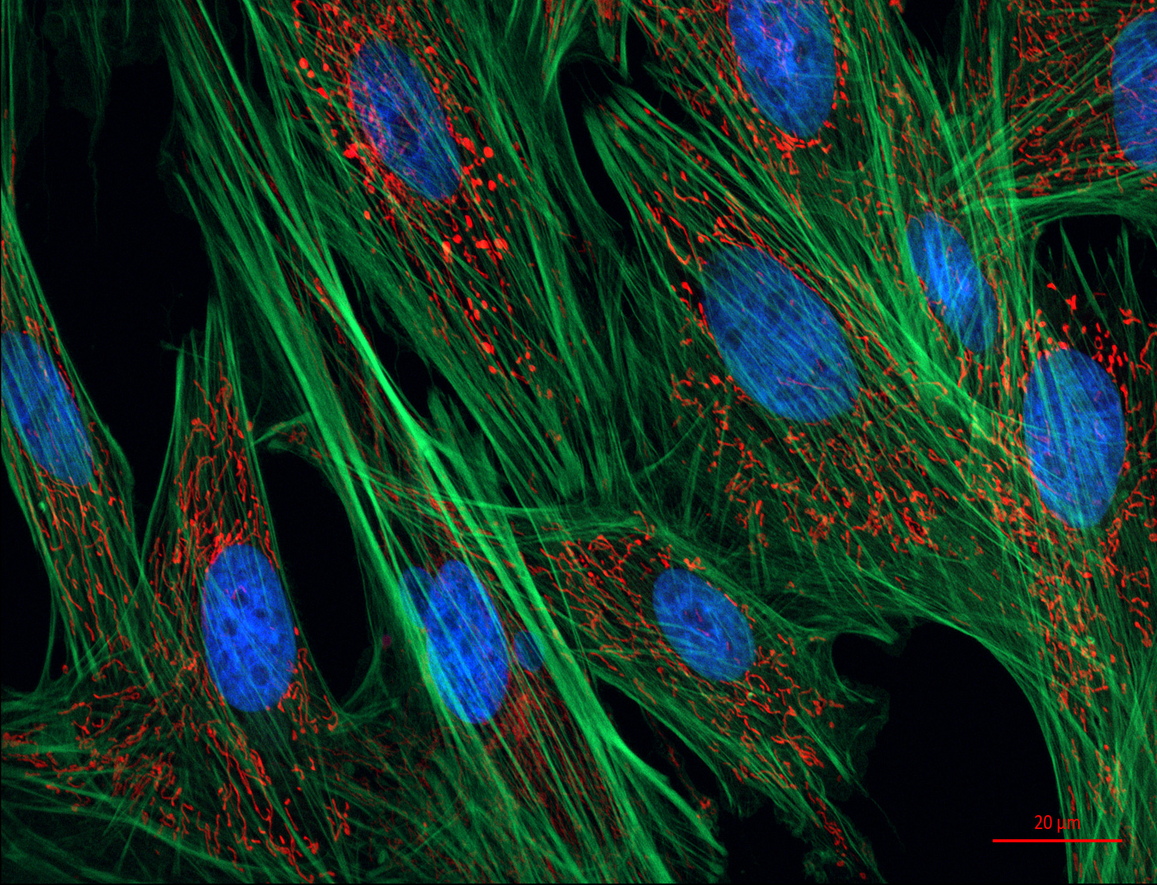

In [51]:
from math import floor
resized = []
for image in all_images:
    resized.append(image.resize((np.array(widths).min(), floor(new_height)), resample=1))
resized[0]

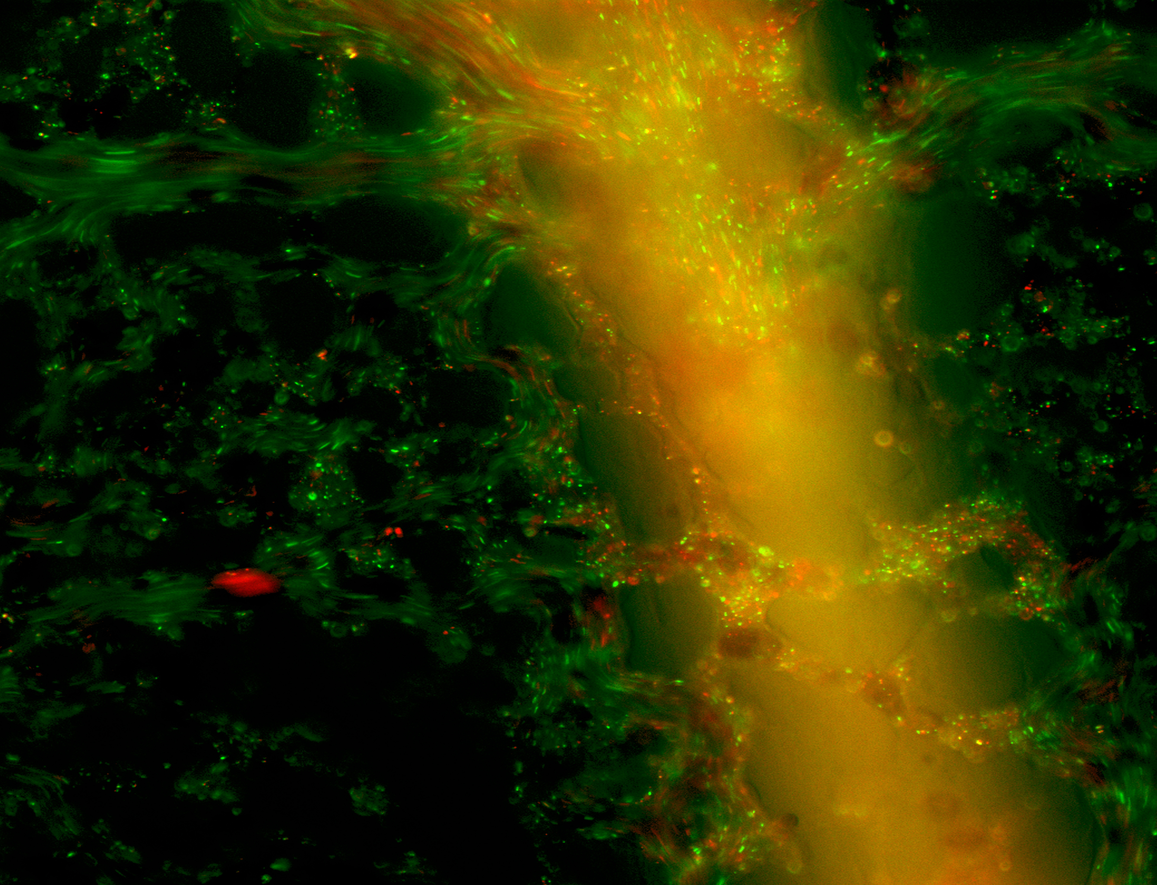

In [52]:
resized[17]

In [78]:
import os
base = '../data/interim/resized/'
rename = 'rimg'
for index, image in enumerate(resized):
    image.save(fp=os.path.join(base, rename + str(index)), format='PNG')

In [53]:
raw_pixel_data_all_images = []
for image in all_images:
    raw_pixel_data_all_images.append(list(image.getdata()))

In [54]:
num_pixels_all_images = []
for image in raw_pixel_data_all_images:
    num_pixels_all_images.append(len(image))
num_pixels_all_images

[2336640,
 2343432,
 2326830,
 2160000,
 2318360,
 1349062,
 13051584,
 6183012,
 4771920,
 4694550,
 13671540,
 6106212,
 1447680,
 1447680,
 17280000,
 6076416,
 1373568,
 15210000,
 15210000,
 18198756,
 14335860,
 9000000,
 13707000,
 9000000,
 12048000,
 14233200,
 9000000,
 9000000]

In [16]:
raw_pixel_data_all_images[0][0:10]

[(0, 1, 0),
 (2, 6, 5),
 (6, 47, 29),
 (2, 88, 39),
 (6, 112, 40),
 (1, 116, 38),
 (5, 109, 46),
 (3, 73, 36),
 (4, 50, 22),
 (8, 53, 30)]

In [17]:
raw_pixel_data_all_images[0][0][0]

0

In [55]:
raw_pixel_data_resized = []
for image in resized:
    raw_pixel_data_resized.append(list(image.getdata()))

In [57]:
num_pixels_resized = []
for image in raw_pixel_data_resized:
    num_pixels_resized.append(len(image))
set(num_pixels_resized)

{1023945}

In [58]:
raw_pixel_data_resized[0][0:10]

[(2, 0, 0),
 (3, 41, 23),
 (5, 105, 40),
 (7, 118, 44),
 (5, 75, 35),
 (4, 47, 24),
 (4, 39, 22),
 (5, 52, 24),
 (5, 89, 38),
 (4, 73, 29)]

In [59]:
raw_pixel_data_resized[0][0][0]

2

In [60]:
extremes = []
for image in resized:
    extremes.append(image.getextrema())
extremes

[((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 234), (0, 255), (0, 255)),
 ((0, 218), (3, 255), (0, 216)),
 ((0, 255), (0, 255), (0, 195)),
 ((4, 255), (0, 255), (0, 233)),
 ((2, 247), (0, 255), (0, 188)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 248), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 3)),
 ((0, 243), (0, 252), (0, 239)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 112)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 185), (1, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((0, 255), (0, 255), (0, 255)),
 ((2, 255), (0, 255), (0, 255))]

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


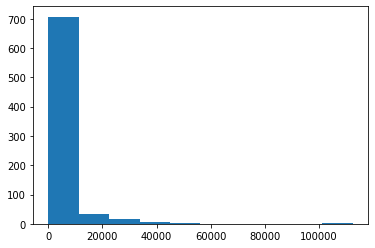

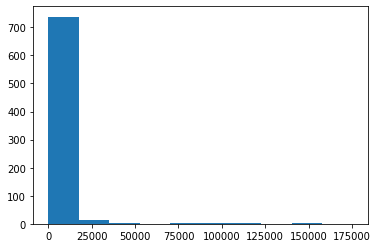

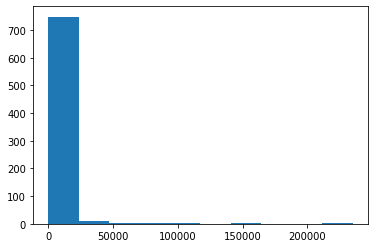

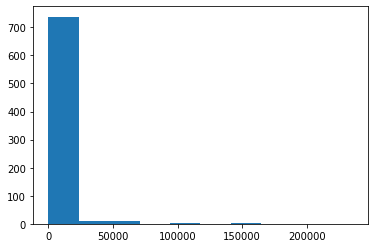

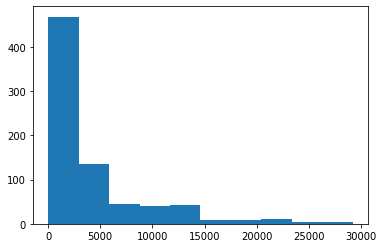

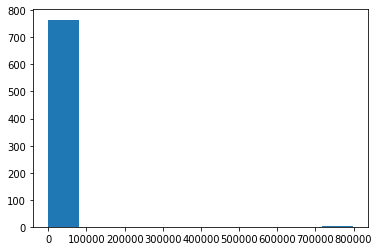

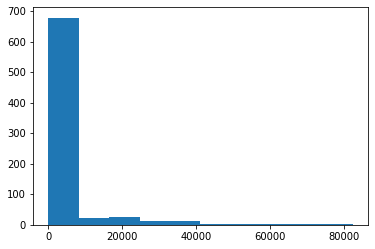

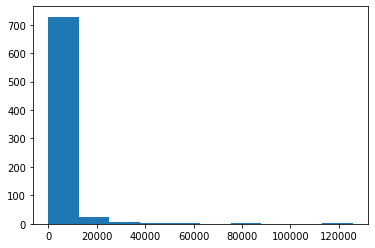

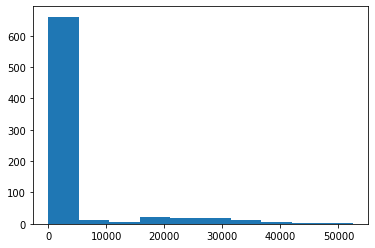

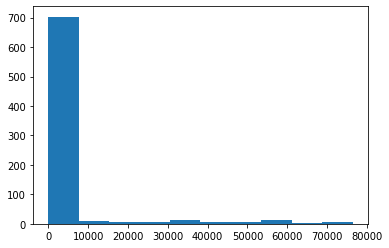

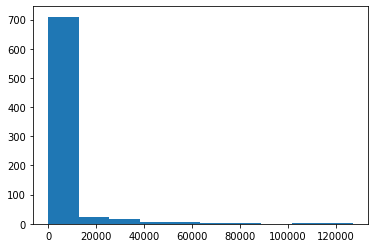

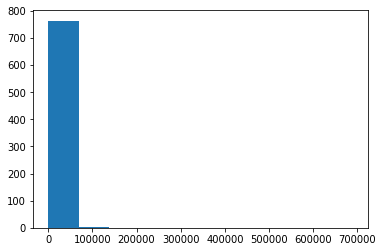

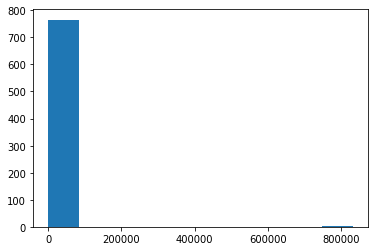

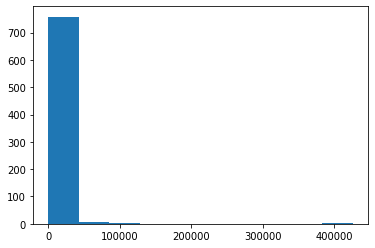

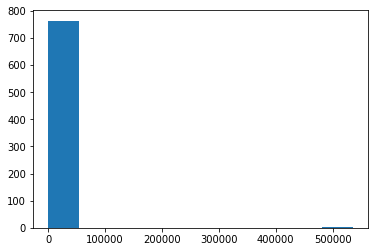

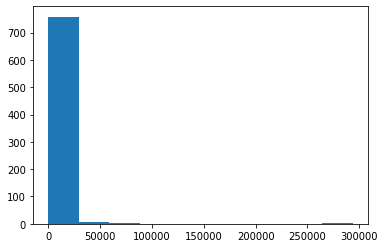

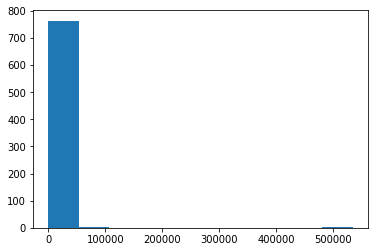

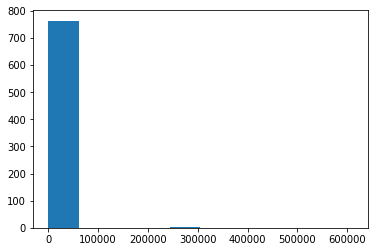

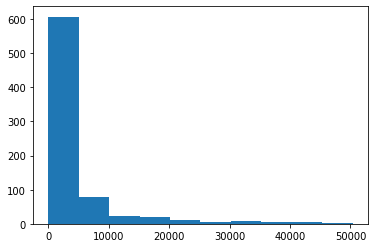

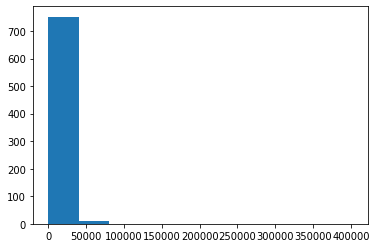

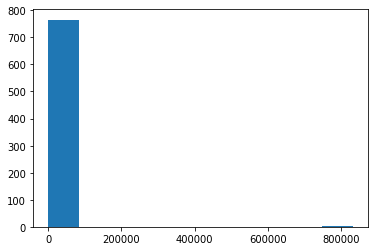

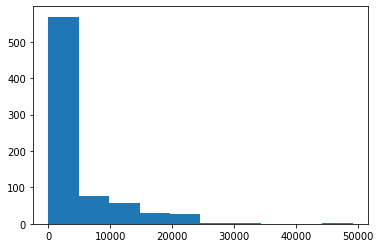

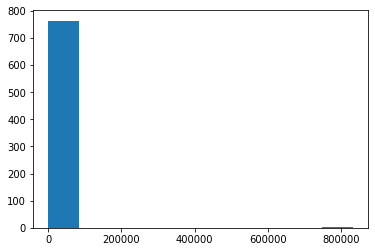

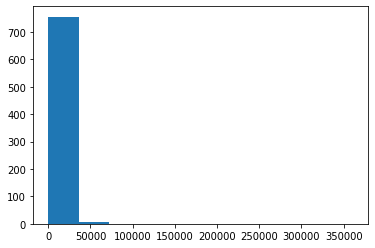

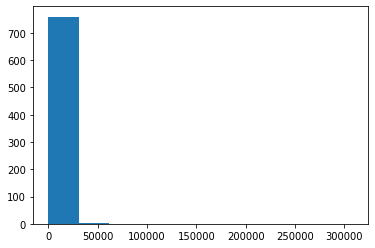

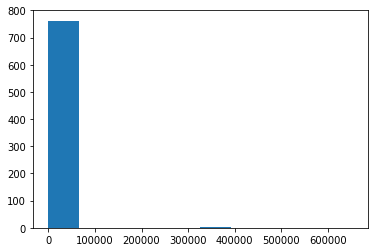

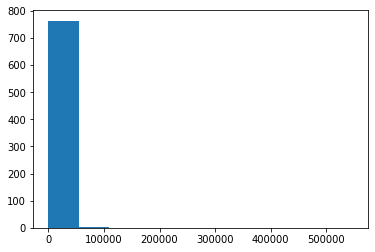

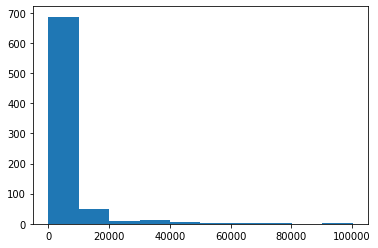

In [61]:
import matplotlib.pyplot as plt
for image in resized:
    plt.figure()
    plt.hist(image.histogram())
    plt.show;

In [62]:
reds = []
greens = []
blues = []
for index, image in enumerate(resized):
    red, green, blue = image.split()
    reds.append(red)
    greens.append(green)
    blues.append(blue)
print(len(reds), len(greens), len(blues))

28 28 28


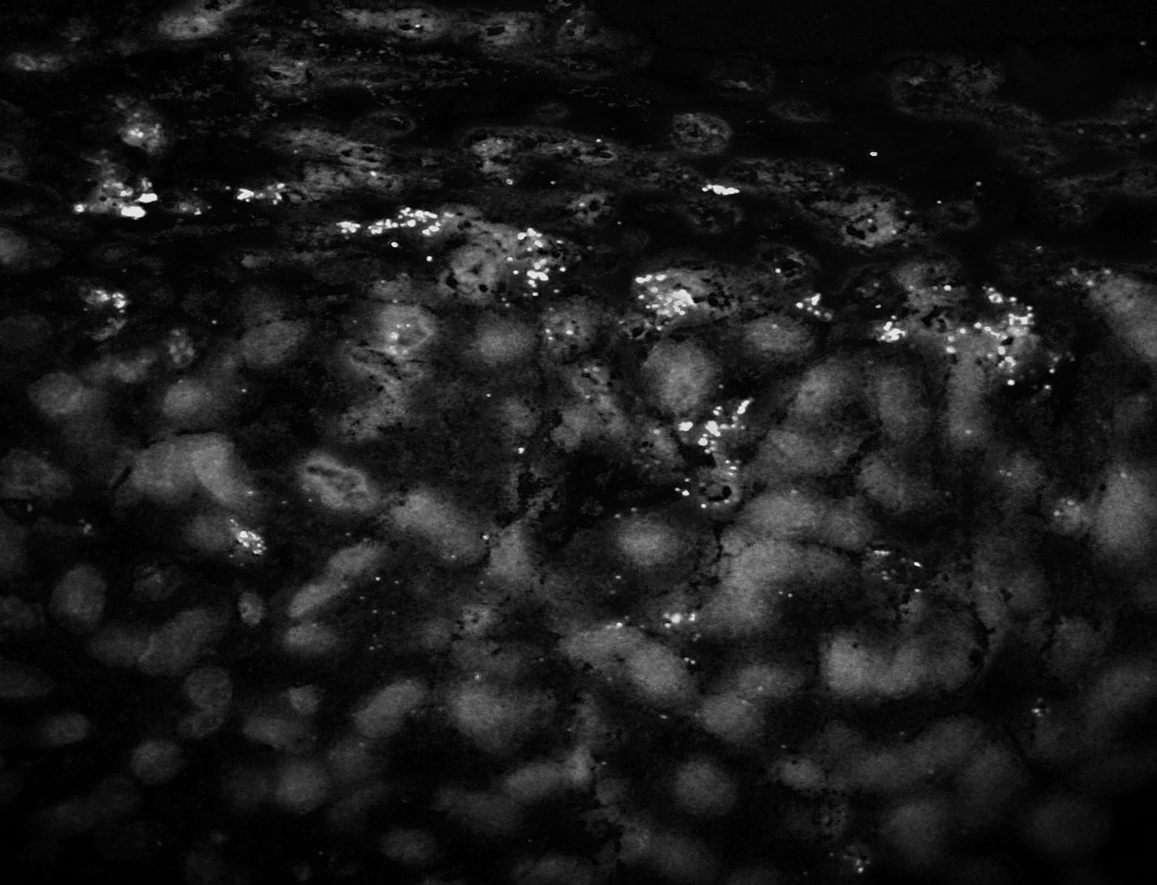

In [69]:
reds[18]

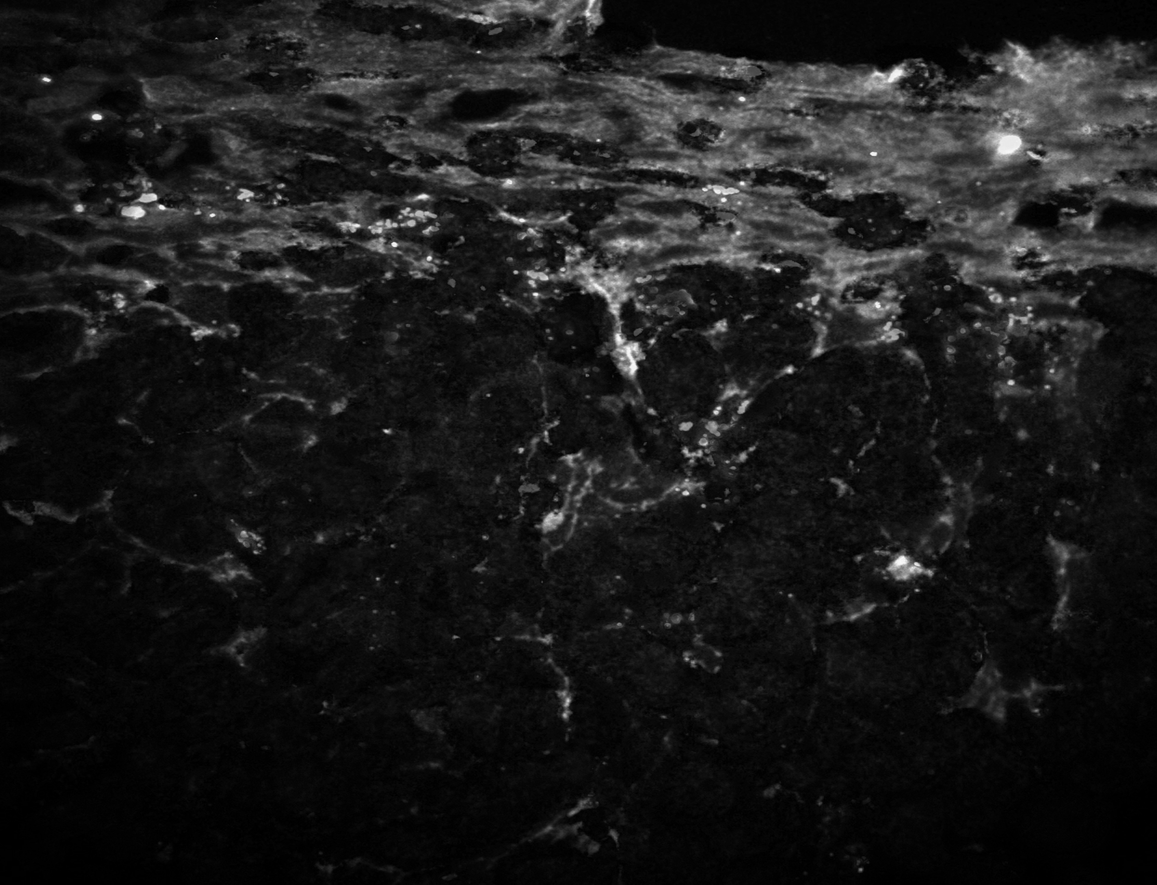

In [70]:
greens[18]

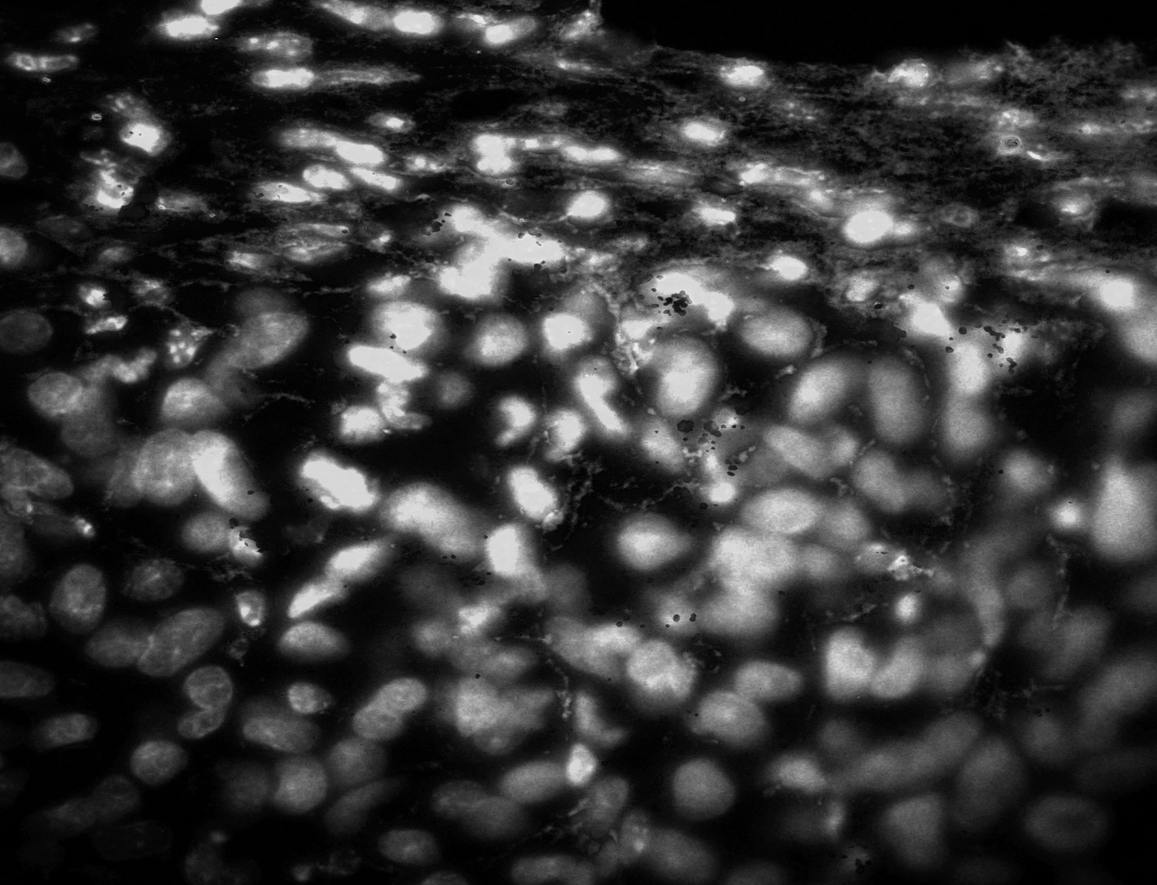

In [71]:
blues[18]

In [79]:
base = '../data/processed/'
rename = 'redimg'
for index, image in enumerate(reds):
    image.save(fp=os.path.join(base, rename + str(index)), format='PNG')
rename = 'greenimg'
for index, image in enumerate(greens):
    image.save(fp=os.path.join(base, rename + str(index)), format='PNG')
rename = 'blueimg'
for index, image in enumerate(reds):
    image.save(fp=os.path.join(base, rename + str(index)), format='PNG')

# References

## For Input Data

Used under, Attribution 2.0 Generic (CC BY 2.0)

### Attributions

Photo by <a href="https://pixnio.com/science/microscopy-images/escherichia-coli/fluorescent-antibody-stained-photomicrograph-revealed-the-presence-of-enteropathogenic-escherichia-coli-bacteria">Berenice Thomason, USCDCP</a> on <a href="https://pixnio.com/">Pixnio</a>

Photo by <a href="https://pixnio.com/science/microscopy-images/escherichia-coli/e-coli-is-a-member-of-the-family-of-bacterial-organisms-within-the-family-enteribacteriaceae">Berenice Thomason, USCDCP</a> on <a href="https://pixnio.com/">Pixnio</a>

Photo by <a href="https://pixnio.com/science/microscopy-images/escherichia-coli/fluorescent-antibody-stained-photomicrograph-depicted-numbers-of-gram-negative-enteropathogenic-escherichia-coli">Charles Farmer, USCDCP</a> on <a href="https://pixnio.com/">Pixnio</a>

Photo by <a href="https://pixnio.com/science/microscopy-images/tularemia-francisella-tularensis/photomicrograph-depicts-francisella-tularensis-bacteria-as-seen-with-a-fluorescent-antibody-stain">Ann Hebert, USCDCP</a> on <a href="https://pixnio.com/">Pixnio</a>

Photo by <a href="https://pixnio.com/science/microscopy-images/leptospirosis-leptospira-spp/photomicrograph-of-a-fluorescent-antibody-fa-stain-of-leptospira-bacteria-in-a-liver-impression-smear">Mildred Galton, USCDCP</a> on <a href="https://pixnio.com/">Pixnio</a>

https://flic.kr/p/MBT6tX

https://flic.kr/p/C7kZRb

https://flic.kr/p/NDky43

https://flic.kr/p/D4LTEC

https://flic.kr/p/C9zyNY

https://flic.kr/p/C9zyS5

https://flic.kr/p/CYNoGi

https://visualsonline.cancer.gov/details.cfm?imageid=11223

https://visualsonline.cancer.gov/details.cfm?imageid=10869

https://visualsonline.cancer.gov/details.cfm?imageid=10873

https://visualsonline.cancer.gov/details.cfm?imageid=10866

https://visualsonline.cancer.gov/details.cfm?imageid=11249

https://visualsonline.cancer.gov/details.cfm?imageid=11261

https://visualsonline.cancer.gov/details.cfm?imageid=11240

https://visualsonline.cancer.gov/details.cfm?imageid=11265

https://visualsonline.cancer.gov/details.cfm?imageid=11238

https://visualsonline.cancer.gov/details.cfm?imageid=11260

https://visualsonline.cancer.gov/details.cfm?imageid=10858

https://visualsonline.cancer.gov/details.cfm?imageid=11167

https://visualsonline.cancer.gov/details.cfm?imageid=11247

## General

https://arstechnica.com/science/2018/08/minigame-integrated-into-eve-online-helps-scientists-understand-cells/

https://keras.io/api/preprocessing/image/

https://www.breakingbayes.com/2017/08/29/designing-a-cnn-preprocessing-architecture-and-parameters/

https://towardsdatascience.com/boost-your-cnn-image-classifier-performance-with-progressive-resizing-in-keras-a7d96da06e20

Yim, J., & Sohn, K. A. (2017, November). Enhancing the performance of convolutional neural networks on quality degraded datasets. In 2017 International Conference on Digital Image Computing: Techniques and Applications (DICTA) (pp. 1-8). IEEE.

Janke, J., Castelli, M., & Popovič, A. (2019). Analysis of the proficiency of fully connected neural networks in the process of classifying digital images. Benchmark of different classification algorithms on high-level image features from convolutional layers. Expert Systems with Applications, 135, 12-38.

Hossain, M. T., Teng, S. W., Zhang, D., Lim, S., & Lu, G. (2019, September). Distortion robust image classification using deep convolutional neural network with discrete cosine transform. In 2019 IEEE International Conference on Image Processing (ICIP) (pp. 659-663). IEEE.

Yim, J., Kim, J. J., & Shin, D. (2018). One-shot item search with multimodal data. arXiv preprint arXiv:1811.10969.

Seals, M. (2019). On the Robustness of Object Detection Based Deep Learning Models.